In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.model_selection.pair_search import PairSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [2]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


In [3]:
# Compare feature_binaries
run1 = RunManager('StatArbStrategy', 'run_0104')
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,feature_binaries,False,156,0.666001,0.065805,-999.0
1,feature_binaries,True,156,0.700695,0.069048,-999.0
2,holding_period,3,104,0.683812,0.064926,-999.0
3,holding_period,5,104,0.704545,0.069716,-999.0
4,holding_period,7,104,0.661686,0.067639,-999.0
5,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",156,0.785165,0.079194,-999.0
6,model,{u'type': u'reg'},156,0.581531,0.055659,-999.0
7,per_side_count,10,156,0.779199,0.068518,-999.0
8,per_side_count,20,156,0.587497,0.066336,-999.0
9,response_days,5,312,0.683348,0.067427,-999.0


In [4]:
# Current drops for production environment
drop_params = [('model', "{u'type': u'reg'}"), ('score_var', 'prma_20'), ('feature_binaries', True)]
runA = RunManager('StatArbStrategy', 'run_0104', drop_params=drop_params)

drop_params = [('model', "{u'type': u'reg'}"), ('score_var', 'prma_20'), ('feature_binaries', False)]
runB = RunManager('StatArbStrategy', 'run_0104', drop_params=drop_params)

In [5]:
combA = CombinationSearch()
combA.set_selection_criteria('sharpe')
combA.params['training_epochs'] = 5
combA.add_run(runA)
combA.start()

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:38<00:00,  7.80s/it]


In [6]:
combB = CombinationSearch()
combB.set_selection_criteria('sharpe')
combB.params['training_epochs'] = 5
combB.add_run(runB)
combB.start()

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:38<00:00,  7.60s/it]


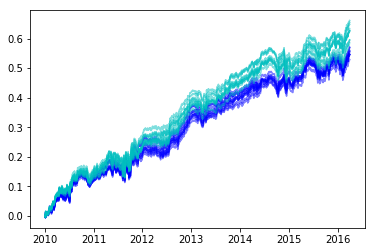

In [7]:
plt.figure()
plt.plot(combA.best_results_returns.dropna().cumsum(), 'b', alpha=0.5)
plt.plot(combB.best_results_returns.dropna().cumsum(), 'c', alpha=0.5)
plt.show()

In [8]:
get_stats(combA.best_results_returns.dropna()).mean(axis=1)

Total               0.55262
Mean                0.00035
Std                 0.00394
Skew                0.31963
Kurt                2.31300
Sharpe              1.41861
Sortino             2.59322
MinRet             -0.01690
WinP                0.52388
DD%                -0.05804
DDDays            125.80000
UnderwaterDays    141.00000
Underwater%        -0.04142
TimeAtHighs         0.14840
VaR_5perc          -0.00576
CVaR_5perc         -0.00813
LPM_2               0.00625
dtype: float64

In [9]:
get_stats(combB.best_results_returns.dropna()).mean(axis=1)

Total               0.62568
Mean                0.00040
Std                 0.00395
Skew                0.20055
Kurt                2.07300
Sharpe              1.60097
Sortino             2.89117
MinRet             -0.01725
WinP                0.53946
DD%                -0.06253
DDDays            136.20000
UnderwaterDays    153.70000
Underwater%        -0.05785
TimeAtHighs         0.16970
VaR_5perc          -0.00586
CVaR_5perc         -0.00826
LPM_2               0.00638
dtype: float64

In [10]:
dfA = rollup_returns(combA.best_results_returns.dropna())
dfA['yr'] = dfA.sum(axis=1)
dfA

Qtr,1,2,3,4,yr
Year,,,,,
2010,0.050208,0.004099,0.087642,-0.023531,0.118418
2011,0.029483,0.013040,-0.022836,0.065054,0.084740
2012,0.020319,-0.003400,0.046187,0.074413,0.137519
2013,-0.022886,0.034526,0.031426,0.020902,0.063969
2014,0.035676,0.014091,-0.015113,0.009380,0.044035
2015,0.008723,0.050579,-0.024987,0.041267,0.075581
2016,0.030970,NaN,NaN,NaN,0.030970


In [11]:
dfB = rollup_returns(combB.best_results_returns.dropna())
dfB['yr'] = dfB.sum(axis=1)
dfB

Qtr,1,2,3,4,yr
Year,,,,,
2010,0.072211,0.014033,0.071849,-0.004276,0.153817
2011,0.029432,0.013011,-0.024128,0.059829,0.078143
2012,0.028949,0.009802,0.055293,0.064263,0.158307
2013,-0.023883,0.023772,0.027599,0.032898,0.060385
2014,0.031848,0.029778,-0.020496,0.008625,0.049755
2015,0.001619,0.058929,-0.017341,0.042613,0.085820
2016,0.040428,NaN,NaN,NaN,0.040428
